# Laborator

**Sarcină:** Dezbateți și adnotați rezolvările problemelor

## Regresie Liniara

### Cerință

Se dau temperaturile in Baia Mare la diferite ore timp de 12 ore...
Task-ul principal este sa prezicem pe baza temperaturiilor cunoscute pentru ora urmatoare

Date:
- Temperatură (&deg;C): `[15, 18, 20, 22, 25, 27, 30, 32, 35, 37, 40, 38]`
- Ora: `[12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]`
- Temperatura este cuprinsa intre 10 si 40 (&deg;C)
- Lista cu ore reprezinta orele din spate ex: 1 = 1 ora in urma, 2 = 2 ore in urma, etc...

Sarcini:
1. Vizualizarea datelor pentru a înțelege natura relației.
2. Antrenarea unui model de regresie liniară simplă.
3. Calcularea metricilor de evaluare: MAE, MSE, RMSE și R<sup>2</sup>.
4. Predicție pentru următoarea oră folosind modelul antrenat.
5. Discuție despre adecvarea modelului liniar (underfitting) și validitatea predicției.

### Rezolvare

Importăm bibliotecile necesare.

In [1]:
import matplotlib.pyplot as plt  # pentru grafice
import numpy as np  # pentru calcul algebric
from sklearn.linear_model import LinearRegression  # algoritmul de regresie liniară
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # metrici de evaluare

Definim datele cu care vom lucra (din enunțul problemei).

In [2]:
hours_ago = np.array([12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]).reshape(-1, 1)  # temperaturile
temperatures = np.array([15, 18, 20, 22, 25, 27, 30, 32, 35, 37, 40, 38])  # unitățile vândute

Trasăm grafic punctele din textul problemei pentru vizualizare.

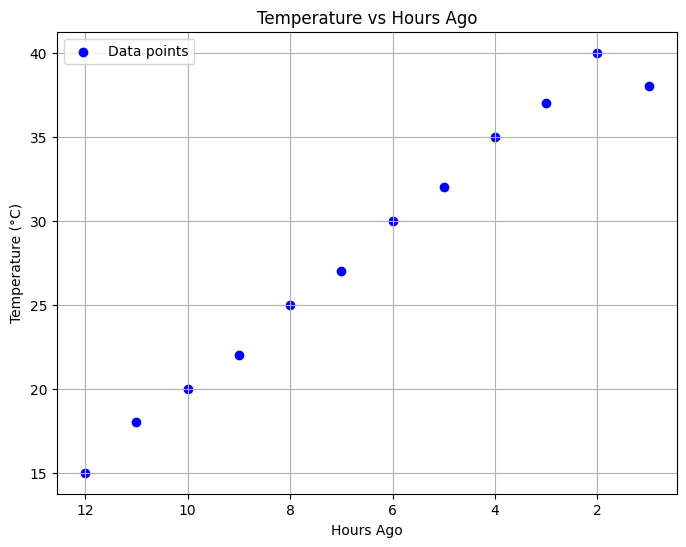

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(hours_ago, temperatures, color='blue', label='Data points')
plt.xlabel('Hours Ago')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs Hours Ago')
plt.grid(True)
plt.legend()
plt.gca().invert_xaxis()
plt.show()

Creăm și antrenăm modelul.

In [4]:
model = LinearRegression()
model.fit(hours_ago, temperatures)

LinearRegression()

Afișăm coeficienții rezultați după antrenare.

In [5]:
coef = model.coef_[0]
intercept = model.intercept_
print(f"Model Coefficients:")
print(f"  Coefficient: {coef:.2f}")
print(f"  Intercept: {intercept:.2f}")

Model Coefficients:
  Coefficient: -2.30
  Intercept: 43.23


Regresia liniară este descrisă de o funcție de gradul 1 (o dreaptă). După antrenare aceasta este $f(x) = 43.23 - 2.30 * x$.

Generăm predicțiile, calculăm metricile de evaluare și afișăm graficul funcției.

=== Linear Regression Metrics ===
MAE: 0.71
MSE: 1.08
RMSE: 1.04
R²: 0.9831


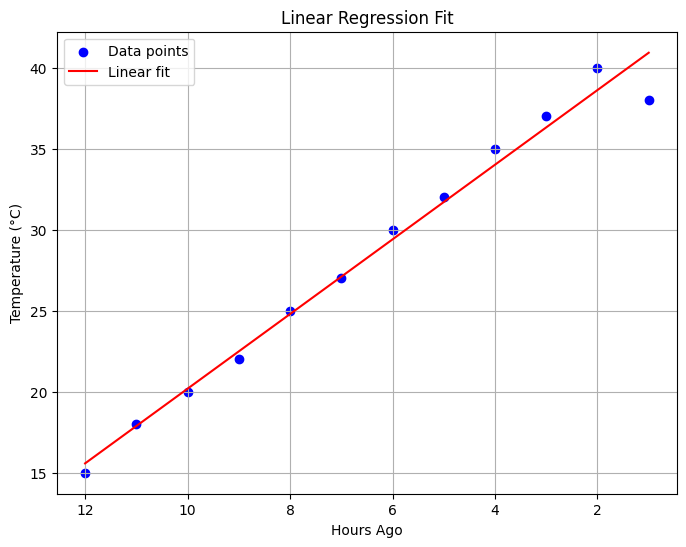


Prediction for next hour (0 hours ago): 43.23 °C


In [6]:
predictions = model.predict(hours_ago)

mae = mean_absolute_error(temperatures, predictions)
mse = mean_squared_error(temperatures, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(temperatures, predictions)

print("=== Linear Regression Metrics ===")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(hours_ago, temperatures, color='blue', label='Data points')
plt.plot(hours_ago, predictions, color='red', label='Linear fit')
plt.xlabel('Hours Ago')
plt.ylabel('Temperature (°C)')
plt.title('Linear Regression Fit')
plt.grid(True)
plt.legend()
plt.gca().invert_xaxis()
plt.show()

next_hour = np.array([[0]])
prediction_next = model.predict(next_hour)[0]
print(f"\nPrediction for next hour (0 hours ago): {prediction_next:.2f} °C")


## Regresie polinomială

### Cerință

Un magazin de înghețată vrea să prezică vânzările zilnice în funcție de temperatură.

Date:
- Temperatură (&deg;C): `[15, 18, 20, 22, 25, 27, 30, 32, 35, 37, 40]`
- Vânzări (unități): `[20, 35, 50, 70, 100, 130, 170, 190, 220, 235, 250]`

Sarcini:
1. Vizualizarea datelor (linear vs curved)
2. Antrenarea modelelor de regresie polinomială de grad 1, 2 și 3
3. Calculare MAE, MSE, RMSE și R<sup>2</sup>
4. Determinare ce temperatură e optimă
5. Predicție pentru 28&deg;C
6. Discuție overfitting vs underfitting

### Rezolvare

Importăm bibliotecile necesare.

In [ ]:
import matplotlib.pyplot as plt  # pentru grafice
import numpy as np  # pentru calcul algebric
from sklearn.linear_model import LinearRegression  # algoritmul principal de regresie
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # metrici de evaluare
from sklearn.preprocessing import PolynomialFeatures  # pentru diferitele grade polinomiale

Definim datele cu care vom lucra (din enunțul problemei).

In [ ]:
temperature = np.array([15, 18, 20, 22, 25, 27, 30, 32, 35, 37, 40]).reshape(-1, 1)  # temperaturile
sales = np.array([20, 35, 50, 70, 100, 130, 170, 190, 220, 235, 250])  # unitățile vândute

Trasăm grafic punctele din textul problemei pentru vizualizare.

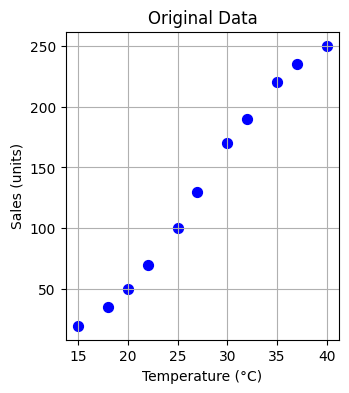

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(temperature, sales, color="blue", s=50)
plt.xlabel("Temperature (°C)")
plt.ylabel("Sales (units)")
plt.title("Original Data")
plt.grid(True)

Pregătim variabilele necesare pentru antrenarea, salvarea și utilizarea modelelor de regresie polinomială.

In [ ]:
degrees = [1, 2, 3]  # vom calcula regresii polinomiale de ordinul 1, 2 și 3
models = {}  # salvăm modelele de regresie
predictions = {}  # salvăm predicțiile acestora

Definim o funcție care pentru un grad polinomial dat (1, 2, 3 etc.) crează și antrenează un model de regresie polinomială. După antrenare afișează graficul fiecărei funcții rezultate.

In [ ]:
# pentru antrenarea și salvarea a câte un model de regresie pentru fiecare grad
def train_and_plot(degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(temperature)  # transformarea datelor de intrare (temperaturilor într-o formă adecvată funcției polinomiale)

    model = LinearRegression()  # încărcarea modelului
    model.fit(X_poly, sales)  # antrenarea modelului
    models[degree] = (poly, model)  # salvarea modelului

    y_pred = model.predict(X_poly)  # generarea predicțiilor
    predictions[degree] = y_pred  # salvarea predicțiilor

    # calcularea metricilor de evaluare
    mae = mean_absolute_error(sales, y_pred)
    mse = mean_squared_error(sales, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(sales, y_pred)

    # afișarea metricilor de evaluare
    print(f"\n=== Polynomial Degree {degree} ===")
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")

    # afișarea coeficienților și a termenului liber a funcției
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_:.2f}")

    # pregătirea intervalelor de afișare pentru grafic
    temp_range = np.linspace(15, 40, 100).reshape(-1, 1)
    X_poly_range = poly.transform(temp_range)
    y_range = model.predict(X_poly_range)

    # afișarea graficului funcției
    plt.subplot(1, 3, degree)
    plt.scatter(temperature, sales, color="blue", s=50, label="Data")
    plt.plot(temp_range, y_range, color="red", linewidth=2, label=f"Degree {degree}")
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Sales (units)")
    plt.title(f"Degree {degree} (R²={r2:.4f})")
    plt.legend()
    plt.grid(True)

Documentație `PolynomialFeatures`: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

În continuare vom rula funcția pentru fiecare grad.


=== Polynomial Degree 1 ===
MAE:  7.72
MSE:  74.41
RMSE: 8.63
R²:   0.9884
Coefficients: [ 0.         10.21688877]
Intercept: -145.93


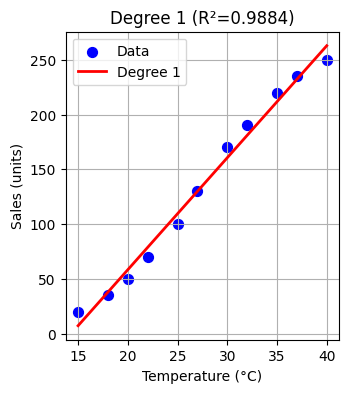

In [ ]:
plt.figure(figsize=(12, 4))  # pentru afișarea corectă a graficului
train_and_plot(1)

Funcția de gradul 1 este o dreaptă. După antrenare aceasta este $f(x) = - 145.93 + 10.21688877 * x$.


=== Polynomial Degree 2 ===
MAE:  7.72
MSE:  74.38
RMSE: 8.62
R²:   0.9884
Coefficients: [ 0.00000000e+00  1.03936742e+01 -3.21289922e-03]
Intercept: -148.17


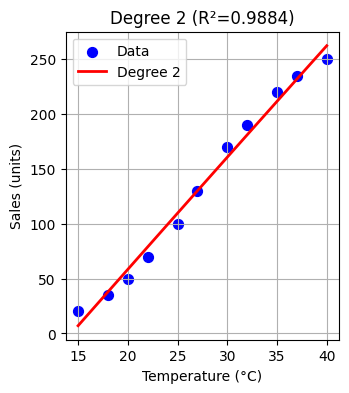

In [ ]:
plt.figure(figsize=(12, 4))  # pentru afișarea corectă a graficului
train_and_plot(2)

Funcția de gradul 2 este o curbă. Modelul a învățat următorii coeficienț: $[0, 10.39..., -0.00321]$ și un intercept (termen liber) de $-148.17$. Aceștia corespund ecuației: $f(x) = -148.17 + 10.3936742 * x - 0.00321 * x ^ 2$.


=== Polynomial Degree 3 ===
MAE:  1.23
MSE:  2.94
RMSE: 1.71
R²:   0.9995
Coefficients: [ 0.00000000e+00 -3.81398155e+01  1.85092297e+00 -2.24771548e-02]
Intercept: 251.96


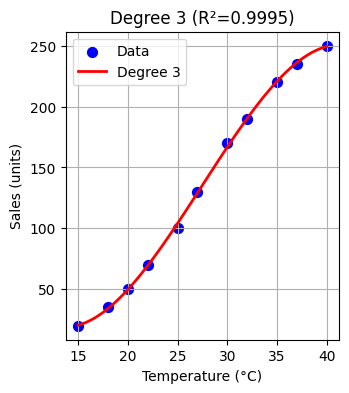

In [ ]:
plt.figure(figsize=(12, 4))  # pentru afișarea corectă a graficului
train_and_plot(3)

Funcția de gradul 3 este o curbă. După antrenare aceasta este $f(x) = 251.96 - 38.1398155 * x + 1.85092297 * x ^ 2 - 0.0224771548 * x ^ 3$.

Din coeficienți, valoarea erorilor și grafice se poate observa că funcțiile de gradul 1, respectiv 2 sunt aproape identice pe intervalul ales. Pentru această problemă, regresia polinomială de gradul 3 este mai potrivită. Totuși, pe un interval mai larg se poate observa overfitting-ul acesteia.

Pentru fiecare model de regresie polinomială creată și salvată în `models` generăm o predicție pentru 28&deg;C.

In [ ]:
print("\n=== Prediction for 28°C ===")
for degree in degrees:
    poly, model = models[degree]
    temp_28 = poly.transform([[28]])
    pred_28 = model.predict(temp_28)[0]
    print(f"Degree {degree}: {pred_28:.2f} units")


=== Prediction for 28°C ===
Degree 1: 140.14 units
Degree 2: 140.33 units
Degree 3: 141.75 units


## Tabel Comparativ

| Aspect | Regresie Liniară | Regresie Polinomială |
| :--- | :--- | :--- |
| **Definiție** | Modelează relația dintre variabile ca o linie dreaptă: `y = mx + b`. | Modelează relația ca o curbă polinomială: `y = a_n x^n + ... + a_1 x + a_0`. |
| **Ipoteze** | Relație liniară între variabile, reziduuri independente. | Poate captura relații neliniare, ipotezele sunt similare, dar modelul este mai flexibil. |
| **Avantaje** | Simplu de implementat și interpretat, rapid de antrenat, bun pentru relații liniare. | Poate modela curbe complexe, mai precis pentru date neliniare, evită underfitting-ul. |
| **Dezavantaje** | Nu funcționează bine pentru date neliniare, risc de underfitting. | Risc de overfitting (supraajustare) cu grade înalte, mai complex și mai lent, necesită alegerea gradului optim. |
| **Când să folosești** | Când relația dintre variabile este liniară sau aproape liniară. | Când datele arată o relație curbă (ex: parabolică), pentru optimizări sau fenomene cu punct maxim/minim. |
| **Exemple de utilizare** | Predicția prețurilor imobiliare bazate pe suprafață, analiza vânzărilor în timp. | Predicția vânzărilor de înghețată în funcție de temperatură, randamentul culturilor în funcție de fertilizatori. |
| **Metrici de evaluare** | MAE, MSE, RMSE, R², evaluate pe date liniare. | Aceleași metrici, compară grade diferite pentru a evita overfitting-ul. |
| **Interpretabilitate** | Coeficienții sunt ușor de înțeles (panta și intercept). | Coeficienții devin mai complecși cu grade mai mari, greu de interpretat. |
| **Sensibilitate la date** | Robust la zgomot dacă relația este liniară, afectat de outlier-i. | Mai sensibil la outlier-i și zgomot, grade înalte pot amplifica erorile. |
| **Overfitting/Underfitting** | Underfitting pentru date neliniare. | Overfitting cu grade prea mari, underfitting cu grade prea mici. |

# Temă

**Sarcină:** Rezolvați și prezentați problemele următoare similar cu cele rezolvate la laborator.

Studenții de la specializarea Matematică informatică vor lucra în grupe de câte două persoane.

Fiecare student/ echipă este necesar să rezolve 2 probleme: Naive Bayes și una dintre regresii.
Pentru 2 puncte bonus (în caz de întârziere a temei) se vor rezolva toate 3 problemele.

## Regresie polinomială

Un fermier dorește să prezică randamentul de grâu în funcție de cantitatea de fertilizator utilizată.

Date:
- Fertilizator (kg/ hectar): `[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]`
- Randament (tone/ hectar): `[2.1, 2.8, 3.6, 4.5, 5.2, 5.8, 6.2, 6.4, 6.5, 6.4, 6.2, 5.9, 5.4, 4.8, 4.0]`

Notă: prea puțin fertilizator = randament mic; cantitate optimă = randament mare; prea mult = scădere randament.

Sarcini:
1. Împărțire date în seturi de antrenament (primele 12 puncte) și testare (ultimele 3 puncte)
2. Antrenare modele de regresie polinomială (grad 1, 2, 3 și 4)
3. Calculare MAE, MSE, RMSE și R<sup>2</sup> atât pentru datele de antrenare cât și testare
4. Identificarea cantității optime de fertilizator
5. Explicare care grad reprezintă cel mai bine realitatea
6. Vizualizarea tuturor modelelor și discutarea overfitting

SUBIECT 1

In [ ]:
import matplotlib.pyplot as plt  # pentru grafice
import numpy as np  # pentru calcul algebric
from sklearn.linear_model import LinearRegression  # algoritmul de regresie liniară
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # metrici de evaluare

In [ ]:
temperature = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]).reshape(-1, 1)  # temperaturile
sales = np.array([20, 35, 50, 70, 100, 130, 170, 190, 220, 235, 250])  # unitățile vândute

## Regresie Liniară

Un proprietar de cafenea vrea să prezică vânzările zilnice în funcție de numărul de clienți care intră pe zi.

Date:

Număr clienți: `[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]`

Vânzări (lei): `[200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640]`

Sarcini:

1. Vizualizarea datelor pentru a înțelege natura relației.
2. Antrenarea unui model de regresie liniară simplă.
3. Calcularea metricilor de evaluare: MAE, MSE, RMSE și R².
4. Predicție pentru o zi cu 170 clienți folosind modelul antrenat.
5. Discuție despre adecvarea modelului liniar (underfitting) și validitatea predicției.